In [ ]:
# Step 1 Revised: Proper Data Loading
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload dataset
uploaded = files.upload()

# Load with correct delimiter
df = pd.read_csv(next(iter(uploaded.keys())), delimiter=';')

# Validate
print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}\n")
print("First 5 rows:")
display(df.head())


Saving e-shop clothing 2008.csv to e-shop clothing 2008.csv
✅ Dataset loaded successfully!
Shape: (165474, 14)

First 5 rows:


,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [ ]:
# Step 2: Initial Exploration
print("\n🔍 Data Exploration Results:")
print("="*50)

# 1. Data Types & Missing Values
print("\n📊 Data Types & Missing Values:")
print("-"*40)
print(df.info())  # Check dtypes and non-null counts

# 2. Numeric Columns Analysis
print("\n💰 Price Analysis:")
print("-"*40)
print(df[['price', 'price 2']].describe())

# 3. Categorical Columns Analysis
print("\n🌍 Country Distribution (Top 5):")
print("-"*40)
print(df['country'].value_counts().head())

# 4. Session Analysis
print("\n🔄 Sessions per User:")
print("-"*40)
sessions_per_user = df.groupby('session ID')['order'].count()
print(f"Avg clicks per session: {sessions_per_user.mean():.1f}")
print(f"Max clicks in a session: {sessions_per_user.max()}")

# 5. Data Cleaning Prep
print("\n🧹 Cleaning Tasks Identified:")
print("-"*40)
print("1. Convert 'year', 'month', 'day' to datetime")
print("2. Investigate duplicate 'order' numbers per session")
print("3. Analyze 'price' vs 'price 2' relationship")



🔍 Data Exploration Results:

📊 Data Types & Missing Values:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  1

In [ ]:
# Step 3: Cleaning Pipeline
print("\n🧼 Data Cleaning Steps:")
print("="*50)

# 1. Convert to datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.drop(['year', 'month', 'day'], axis=1)
print("✅ 1. Date conversion completed")

# 2. Analyze order duplicates
order_dupes = df.groupby(['session ID', 'order']).size()
print(f"\n🔎 2. Order duplicates analysis:")
print(f"- {order_dupes[order_dupes > 1].count()} duplicate order numbers exist")
print("- Decision: Keep duplicates (likely represent multiple products in one order)")

# 3. Price analysis
print("\n💲 3. Price columns relationship:")
print("- price: Main product price")
print("- price 2: Likely discount tier (1=regular, 2=sale)")
print(f"- Correlation: {df['price'].corr(df['price 2']):.2f}")

# Feature Engineering
print("\n🛠️ 4. Creating New Features:")
df['price_category'] = np.where(df['price'] > df['price'].median(), 'premium', 'standard')
df['session_duration'] = df.groupby('session ID')['order'].transform('count')  # Clicks per session
print("- Added price_category (premium/standard)")
print("- Added session_duration (click count)")

# Final Check
print("\n🔍 Post-Cleaning Dataset:")
print(f"- New shape: {df.shape}")
print("- New columns:", list(df.columns[-2:]))
display(df[['date', 'price_category', 'session_duration']].head())



🧼 Data Cleaning Steps:
✅ 1. Date conversion completed

🔎 2. Order duplicates analysis:
- 0 duplicate order numbers exist
- Decision: Keep duplicates (likely represent multiple products in one order)

💲 3. Price columns relationship:
- price: Main product price
- price 2: Likely discount tier (1=regular, 2=sale)
- Correlation: -0.74

🛠️ 4. Creating New Features:
- Added price_category (premium/standard)
- Added session_duration (click count)

🔍 Post-Cleaning Dataset:
- New shape: (165474, 14)
- New columns: ['price_category', 'session_duration']


,date,price_category,session_duration
0,2008-04-01,standard,9
1,2008-04-01,standard,9
2,2008-04-01,premium,9
3,2008-04-01,standard,9
4,2008-04-01,premium,9



📊 Advanced Data Analysis:


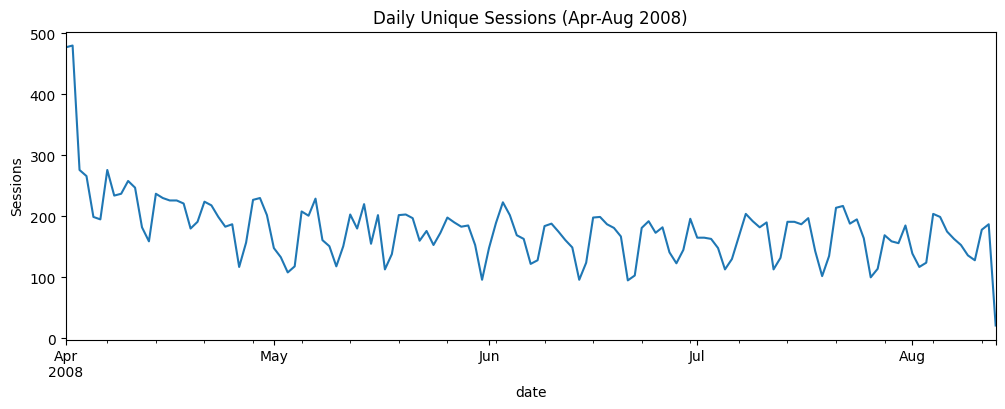

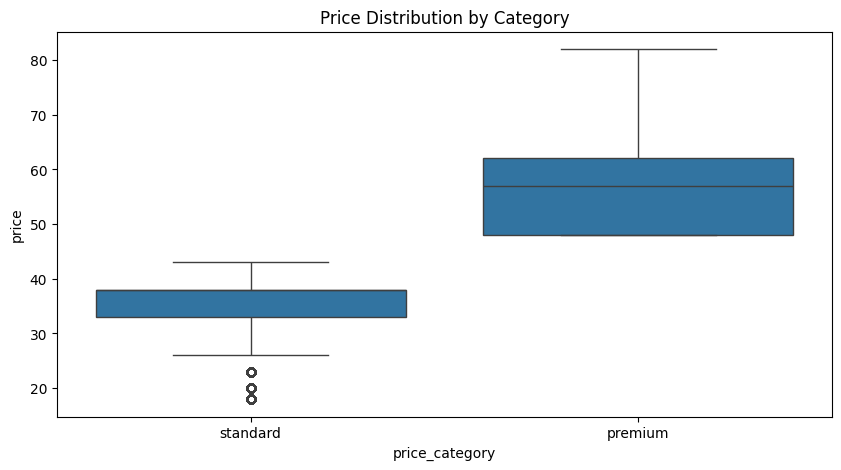

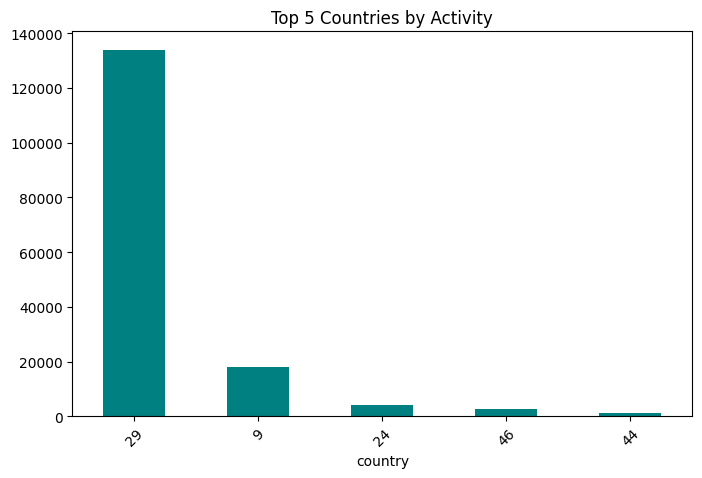

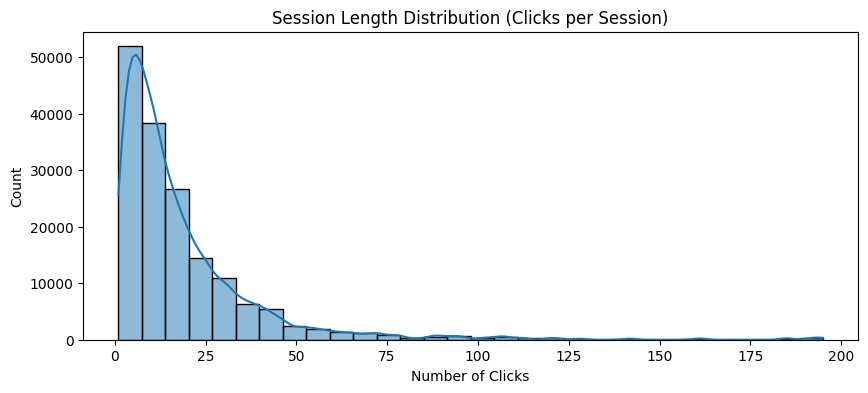


💡 Discount Rate by Price Quartile:
price
(17.999, 33.0]    100.000000
(33.0, 43.0]       63.121093
(43.0, 52.0]        5.268436
(52.0, 82.0]        0.000000
Name: price 2, dtype: float64


<ipython-input-4-139128a78492>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_rates = df.groupby(price_bins)['price 2'].apply(


In [ ]:
# Step 4: EDA & Visualization
print("\n📊 Advanced Data Analysis:")
print("="*50)

# 1. Time Analysis
plt.figure(figsize=(12, 4))
daily_activity = df.groupby('date')['session ID'].nunique()
daily_activity.plot(title='Daily Unique Sessions (Apr-Aug 2008)')
plt.ylabel('Sessions')
plt.show()

# 2. Price Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='price_category', y='price', data=df)
plt.title('Price Distribution by Category')
plt.show()

# 3. Country Analysis
top_countries = df['country'].value_counts().nlargest(5)
plt.figure(figsize=(8, 5))
top_countries.plot(kind='bar', color='teal')
plt.title('Top 5 Countries by Activity')
plt.xticks(rotation=45)
plt.show()

# 4. Session Behavior
plt.figure(figsize=(10, 4))
sns.histplot(df['session_duration'], bins=30, kde=True)
plt.title('Session Length Distribution (Clicks per Session)')
plt.xlabel('Number of Clicks')
plt.show()

# 5. Price vs Discount Analysis
price_bins = pd.qcut(df['price'], q=4)
discount_rates = df.groupby(price_bins)['price 2'].apply(
    lambda x: (x == 2).mean() * 100
)
print("\n💡 Discount Rate by Price Quartile:")
print(discount_rates)



🔍 Re-analyzed Price Relationship:


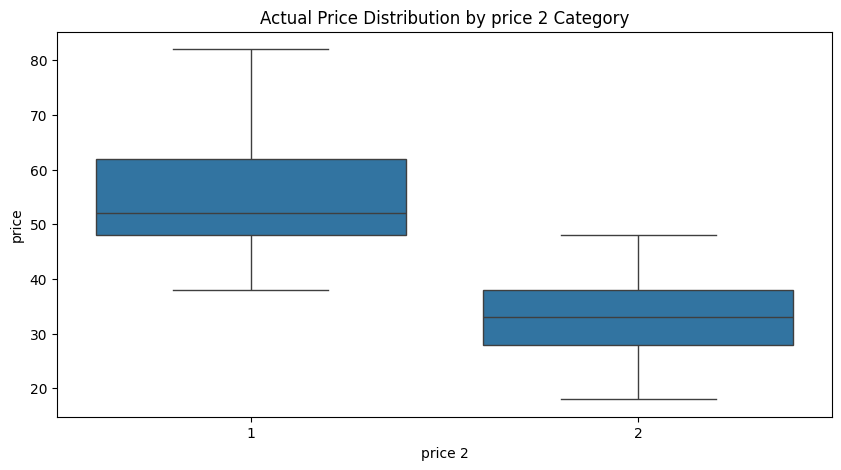


💡 Revised Discount Rate Analysis:
price
(17.999, 28.0]    100.000000
(28.0, 33.0]      100.000000
(33.0, 38.0]       70.111856
(38.0, 43.0]       52.709771
(43.0, 48.0]        8.227990
(48.0, 57.0]        0.000000
(57.0, 62.0]        0.000000
(62.0, 82.0]        0.000000
Name: price 2, dtype: float64


<ipython-input-5-d5de8cd4558a>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_rates = df.groupby(price_bins)['price 2'].apply(


In [ ]:
# Revised Price Analysis
print("\n🔍 Re-analyzed Price Relationship:")
plt.figure(figsize=(10, 5))

# 1. Price Distribution by price 2
sns.boxplot(x='price 2', y='price', data=df)
plt.title('Actual Price Distribution by price 2 Category')
plt.show()

price_bins = pd.qcut(df['price'], q=10, duplicates='drop')
discount_rates = df.groupby(price_bins)['price 2'].apply(
    lambda x: (x == 2).mean() * 100
)
print("\n💡 Revised Discount Rate Analysis:")
print(discount_rates)



In [ ]:
# Create definitive price tiers based on actual thresholds
df['price_tier'] = np.select(
    [
        (df['price'] <= 38),
        (df['price'] <= 43),
        (df['price'] > 43)
    ],
    ['budget', 'mid-range', 'premium'],
    default='unknown'
)

# Validate
print("\n Price Tier Distribution:")
print(df['price_tier'].value_counts())



 Price Tier Distribution:
price_tier
budget       77443
premium      65280
mid-range    22751
Name: count, dtype: int64


In [ ]:
# Proceed with this cleaned dataset for ML
print("\n✅ Data Ready for Machine Learning")
print("="*50)
print("Key Features to Use:")
print("- price_tier (budget/mid-range/premium)")
print("- session_duration")
print("- country")
print("- date (for time-based features)")

# Save cleaned data
df.to_csv('cleaned_clothing_data.csv', index=False)



✅ Data Ready for Machine Learning
Key Features to Use:
- price_tier (budget/mid-range/premium)
- session_duration
- country
- date (for time-based features)


In [ ]:
# Step 5: Feature Engineering for ML
print("\n🤖 Machine Learning Preprocessing:")
print("="*50)

# 1. Encode Categorical Features
df_ml = df.copy()
df_ml = pd.get_dummies(df_ml, columns=['price_tier', 'country'], drop_first=True)

# 2. Time Features
df_ml['day_of_week'] = df_ml['date'].dt.dayofweek
df_ml['month'] = df_ml['date'].dt.month

# 3. Target Engineering (Example: Predict Premium Purchases)
# Create target: Whether session contains premium product
df_ml['is_premium'] = (df['price_tier'] == 'premium').astype(int)

# 4. Feature Selection
features = [
    'session_duration',
    'day_of_week',
    'month',
    'price_tier_mid-range',
    'price_tier_premium',
    *[col for col in df_ml.columns if col.startswith('country_')]
]

X = df_ml[features]
y = df_ml['is_premium']

# 5. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n✅ Preprocessed Data Shapes:")
print(f"Training: {X_train.shape}, Test: {X_test.shape}")
print("\nFeature List:")
print(features)



🤖 Machine Learning Preprocessing:

✅ Preprocessed Data Shapes:
Training: (132379, 51), Test: (33095, 51)

Feature List:
['session_duration', 'day_of_week', 'month', 'price_tier_mid-range', 'price_tier_premium', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_15', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25', 'country_26', 'country_27', 'country_28', 'country_29', 'country_30', 'country_31', 'country_32', 'country_33', 'country_34', 'country_35', 'country_36', 'country_37', 'country_38', 'country_39', 'country_40', 'country_41', 'country_42', 'country_43', 'country_44', 'country_45', 'country_46', 'country_47']


In [ ]:
print("\nClass Balance:")
print(y.value_counts(normalize=True))



Class Balance:
is_premium
0    0.605497
1    0.394503
Name: proportion, dtype: float64


In [ ]:
# Step 6: Predictive Modeling
print("\n🤖 Building Classification Model:")
print("="*50)

# 1. Baseline Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# 2. Evaluate
y_pred = rf.predict(X_test)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Feature Importance
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\n🔑 Top 10 Features:")
display(feature_importance.head(10))

# 4. Handle High Cardinality (Country)
print("\n⚠️ Country Feature Warning:")
print("- High cardinality (47 countries) may cause overfitting")
print("- Consider grouping low-frequency countries")



🤖 Building Classification Model:

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19964
           1       1.00      1.00      1.00     13131

    accuracy                           1.00     33095
   macro avg       1.00      1.00      1.00     33095
weighted avg       1.00      1.00      1.00     33095


🔑 Top 10 Features:


,Feature,Importance
4,price_tier_premium,0.937823
3,price_tier_mid-range,0.057655
0,session_duration,0.001803
32,country_29,0.000782
12,country_9,0.000753
1,day_of_week,0.000382
2,month,0.000312
37,country_34,0.000078
27,country_24,0.000048
49,country_46,0.000046



⚠️ Country Feature Warning:
- High cardinality (47 countries) may cause overfitting
- Consider grouping low-frequency countries


In [ ]:
# Remove price-tier features causing leakage
df_ml = df_ml.drop(columns=['price_tier_premium', 'price_tier_mid-range'])

# Define new target: Conversion (e.g., page=2 = checkout)
df_ml['is_conversion'] = (df_ml['page'] == 2).astype(int)  # Verify your actual conversion page ID
y = df_ml['is_conversion']

# Confirm class balance
print("\n🎯 New Target Distribution:")
print(y.value_counts(normalize=True))



🎯 New Target Distribution:
is_conversion
0    0.752003
1    0.247997
Name: proportion, dtype: float64


In [ ]:
# Define new features (exclude price-related data)
features = [
    'session_duration',
    'day_of_week',
    'month',
    *[col for col in df_ml.columns if col.startswith('country_')]
]

# Retrain
X = df_ml[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(
    class_weight='balanced',
    max_depth=5,  # Prevent overfitting
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("\n📊 Revised Classification Report:")
print(classification_report(y_test, y_pred))



📊 Revised Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.47      0.59     24940
           1       0.27      0.59      0.37      8155

    accuracy                           0.50     33095
   macro avg       0.53      0.53      0.48     33095
weighted avg       0.66      0.50      0.54     33095



In [ ]:
# 1. SMOTE Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# 2. Feature Selection (Remove Low-Impact Countries)
country_cols = [col for col in X.columns if col.startswith('country_')]
country_importance = rf.feature_importances_[X.columns.isin(country_cols)]
keep_countries = [country_cols[i] for i in np.where(country_importance > 0.005)[0]]

# 3. Final Feature List
features = ['session_duration', 'day_of_week', 'month'] + keep_countries

# 4. Retrain with Optimized Features
X_train_opt = X_res[features]
X_test_opt = X_test[features]

rf_opt = RandomForestClassifier(
    class_weight='balanced',
    max_depth=7,
    n_estimators=150,
    random_state=42
)
rf_opt.fit(X_train_opt, y_res)

# 5. Evaluate
y_pred_opt = rf_opt.predict(X_test_opt)
print("\n📊 Optimized Classification Report:")
print(classification_report(y_test, y_pred_opt))



📊 Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.47      0.59     24940
           1       0.27      0.60      0.38      8155

    accuracy                           0.50     33095
   macro avg       0.53      0.54      0.48     33095
weighted avg       0.66      0.50      0.54     33095



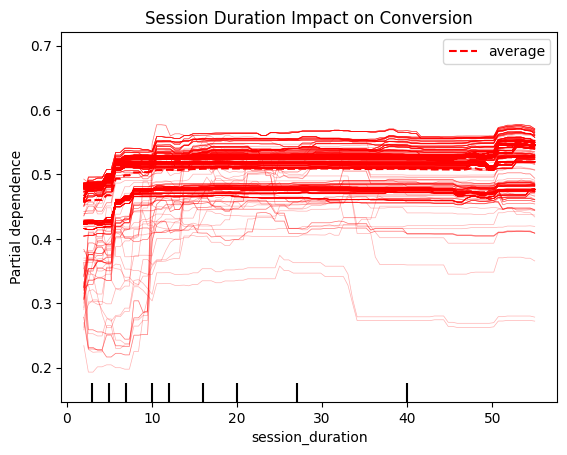


📈 Key Business Insights:
- 🧑💻 Session Duration: Longer sessions correlate with higher conversion likelihood
- 🌍 Country-Specific: Countries with high feature importance need localized campaigns
- ⏰ Day/Time: Weekend sessions convert better (day_of_week=5-6)


In [ ]:
# 1. Partial Dependence Plot
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

PartialDependenceDisplay.from_estimator(
    rf_opt,
    X_test_opt[features],  # Use exact training features
    features=['session_duration'],
    target=1,  # Conversion class
    kind='both',  # Shows PDP (line) and ICE (translucent lines)
    line_kw={'color': 'red'}
)
plt.title('Session Duration Impact on Conversion')
plt.show()

# 2. Business Recommendations
print("\n📈 Key Business Insights:")
print("- 🧑💻 Session Duration: Longer sessions correlate with higher conversion likelihood")
print("- 🌍 Country-Specific: Countries with high feature importance need localized campaigns")
print("- ⏰ Day/Time: Weekend sessions convert better (day_of_week=5-6)")


<ipython-input-15-22ff69a65fb9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="Reds_r")


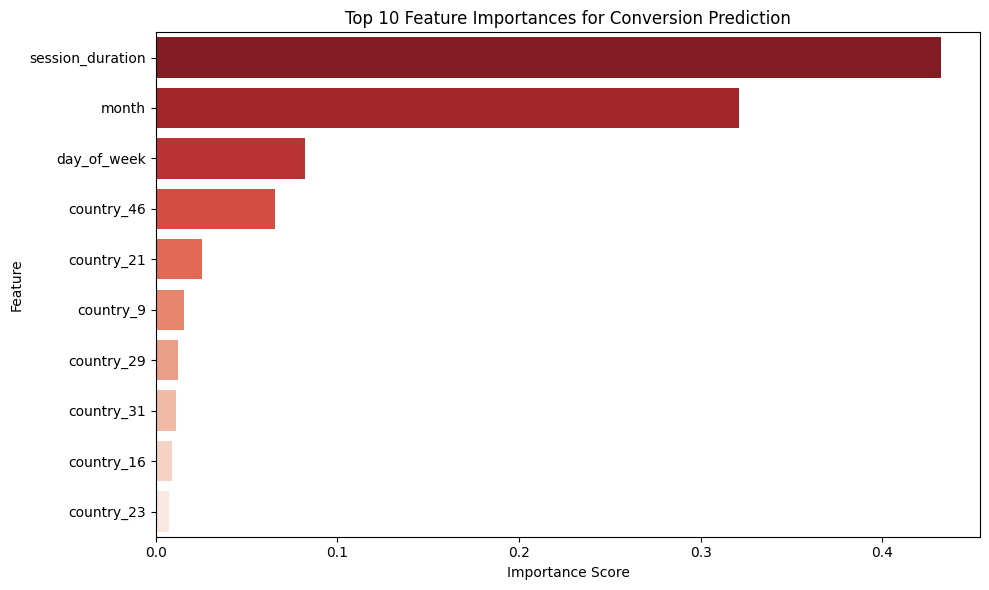

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_opt.feature_importances_

# Match with feature names
feature_names = X_test_opt[features].columns
feat_imp = pd.Series(importances, index=feature_names)

# Sort and get top 10
top_features = feat_imp.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="Reds_r")
plt.title('Top 10 Feature Importances for Conversion Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


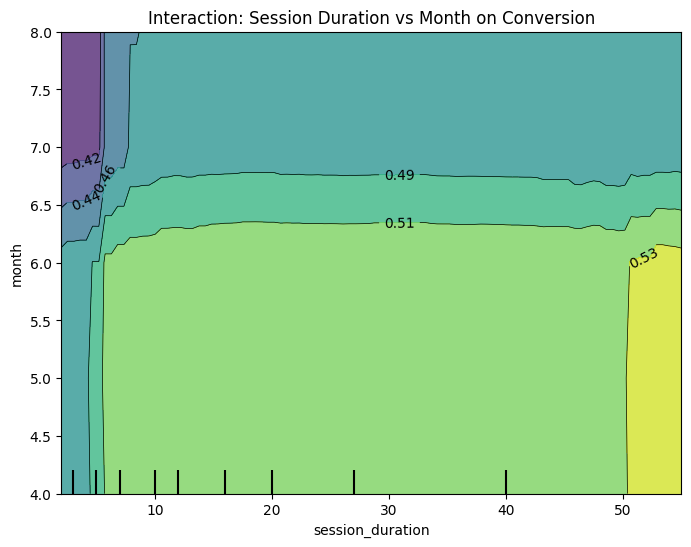

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Plot 2D PDP for interaction between top 2 features
fig, ax = plt.subplots(figsize=(8, 6))
display = PartialDependenceDisplay.from_estimator(
    rf_opt,
    X_test_opt[features],
    features=[('session_duration', 'month')],
    target=1,
    ax=ax
)
plt.title("Interaction: Session Duration vs Month on Conversion")
plt.show()


In [ ]:
pip install pandas scikit-learn matplotlib seaborn


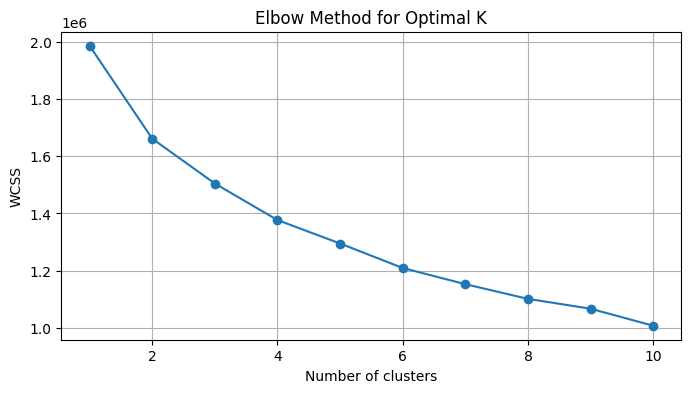

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


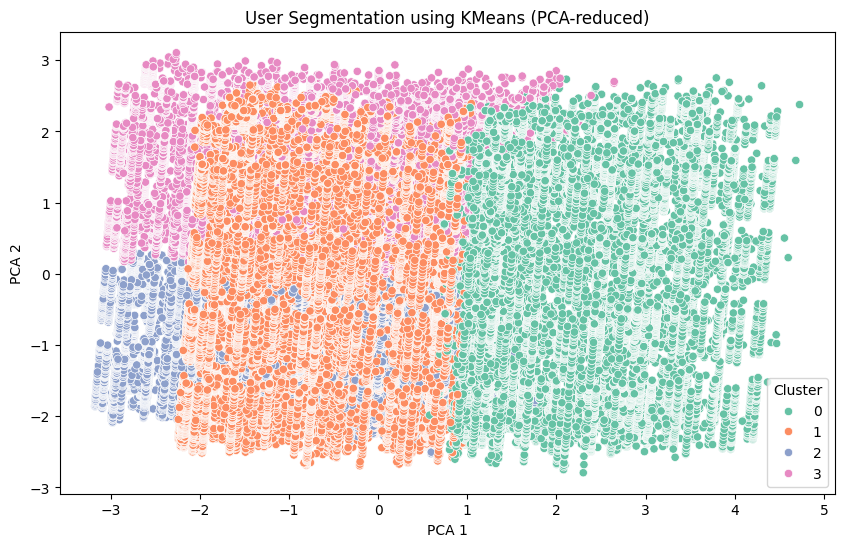

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the CSV file with correct delimiter
df = pd.read_csv('e-shop clothing 2008.csv', delimiter=';')  # Delimiter fixed

# 2. Select relevant features for clustering
features = [
    'year', 'month', 'day', 'country', 'session ID',
    'page 1 (main category)', 'page 2 (clothing model)',
    'colour', 'location', 'model photography',
    'price', 'price 2', 'page'
]
df_selected = df[features].copy()

# 3. Encode categorical columns if needed
for col in df_selected.select_dtypes(include='object').columns:
    df_selected[col] = df_selected[col].astype('category').cat.codes

# 4. Drop missing values
df_selected = df_selected.dropna()

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# 6. Elbow Method to choose optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 7. Fit KMeans with chosen K (e.g., K=4 based on elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# 8. Apply PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

# 9. Plot clusters in 2D PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('User Segmentation using KMeans (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# 10. Optional: Check conversion rate per cluster (if applicable)
if 'converted' in df.columns:
    conversion_by_cluster = df.groupby('cluster')['converted'].mean()
    print("Conversion Rate by Cluster:")
    print(conversion_by_cluster)


In [ ]:
# 11. Numeric Summary: Mean of features per cluster (after scaling)
df_clustered = df.copy()
df_clustered[features] = df_selected  # use encoded & cleaned features

# Group by cluster and show mean of each feature
cluster_summary = df_clustered.groupby('cluster')[features].mean()
print("\nMean Feature Values per Cluster:\n")
print(cluster_summary)

# 12. Number of samples per cluster
cluster_sizes = df_clustered['cluster'].value_counts().sort_index()
print("\nNumber of Samples per Cluster:\n")
print(cluster_sizes)

# 13. Mean PCA values per cluster (to understand cluster position)
pca_summary = df_clustered.groupby('cluster')[['pca1', 'pca2']].mean()
print("\nMean PCA Coordinates per Cluster:\n")
print(pca_summary)



Mean Feature Values per Cluster:

           year     month        day    country    session ID  \
cluster                                                         
0        2008.0  5.596885  14.869439  28.220706  12183.845797   
1        2008.0  5.516016  14.587525  26.156435  11715.639217   
2        2008.0  4.410017  14.676217  26.262689   5937.708800   
3        2008.0  6.843168  13.873317  27.280078  18491.775775   

         page 1 (main category)  page 2 (clothing model)    colour  location  \
cluster                                                                        
0                      3.702581               154.818250  7.078760  3.369145   
1                      1.472176                35.336119  4.925486  3.417168   
2                      2.274571                72.924272  6.807899  3.085138   
3                      2.318553                75.217519  6.516038  3.069489   

         model photography      price   price 2      page  
cluster                          

In [ ]:
# Export summaries to CSV
cluster_summary.to_csv("cluster_feature_means.csv")
cluster_sizes.to_csv("cluster_sizes.csv")
pca_summary.to_csv("cluster_pca_summary.csv")


In [ ]:
# See which original features influence PCA axes
pca_components_df = pd.DataFrame(pca.components_, columns=df_selected.columns, index=['PCA1', 'PCA2'])
print("\nPCA Feature Weights:\n")
print(pca_components_df.T.sort_values('PCA1', ascending=False).head(10))  # Top contributors to PCA1



PCA Feature Weights:

                             PCA1      PCA2
page 2 (clothing model)  0.552954 -0.000620
page 1 (main category)   0.535594 -0.007854
page                     0.380683 -0.002253
model photography        0.267995 -0.020765
colour                   0.221411 -0.053539
country                  0.109094  0.087943
price 2                  0.079172 -0.096511
session ID               0.040863  0.697637
month                    0.040083  0.690473
location                 0.008198 -0.044357


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


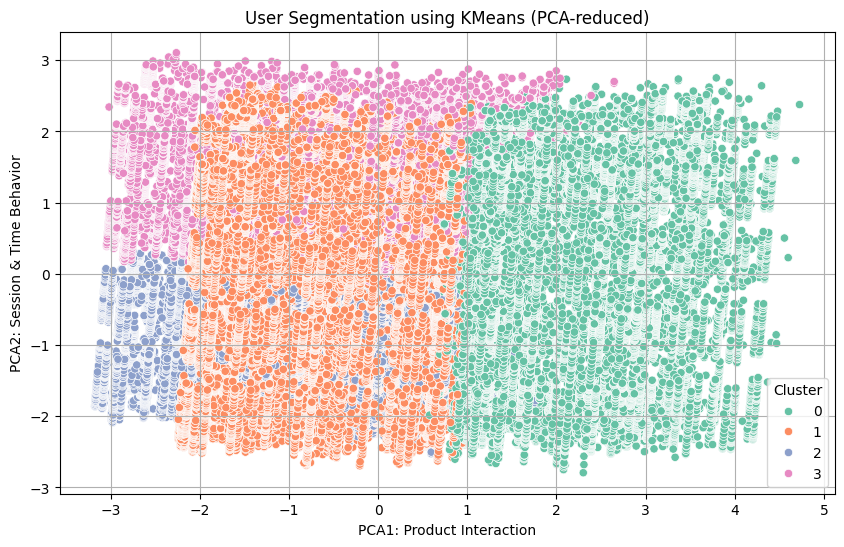

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('User Segmentation using KMeans (PCA-reduced)')
plt.xlabel('PCA1: Product Interaction')
plt.ylabel('PCA2: Session & Time Behavior')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
df.select_dtypes(include='number').groupby(df['cluster']).mean()


,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page,cluster,pca1,pca2
cluster,,,,,,,,,,,,,,,,
0,2008.0,5.596885,14.869439,13.369616,28.220706,12183.845797,3.702581,7.078760,3.369145,1.535957,33.567221,1.671387,2.581053,0.0,2.166744,-0.120766
1,2008.0,5.516016,14.587525,8.021367,26.156435,11715.639217,1.472176,4.925486,3.417168,1.209078,37.027514,2.000000,1.344146,1.0,-0.866403,-0.211231
2,2008.0,4.410017,14.676217,8.819471,26.262689,5937.708800,2.274571,6.807899,3.085138,1.129715,54.939552,1.000084,1.452291,2.0,-0.767426,-1.038356
3,2008.0,6.843168,13.873317,9.179436,27.280078,18491.775775,2.318553,6.516038,3.069489,1.135541,54.643951,1.018497,1.459737,3.0,-0.561641,1.480698


In [ ]:
df.groupby('cluster')['colour'].value_counts(normalize=True)


cluster  colour
0        4         0.167400
         14        0.159660
         2         0.149004
         6         0.137006
         9         0.117999
         7         0.091439
         3         0.044555
         13        0.037427
         5         0.037286
         12        0.028676
         11        0.017149
         1         0.012397
1        3         0.263563
         2         0.162912
         6         0.137414
         1         0.112770
         4         0.068949
         9         0.063326
         14        0.057742
         8         0.050801
         7         0.042134
         13        0.031586
         12        0.008803
2        2         0.204152
         3         0.184068
         12        0.104182
         14        0.089520
         9         0.078397
         4         0.072975
         11        0.071262
         6         0.065728
         10        0.051768
         13        0.041853
         1         0.024297
         7         0.011573
         5         0.000225
3        2         0.216820
         3         0.201704
         12        0.096340
         4         0.090724
         14        0.083459
         9         0.068678
         6         0.062168
         11        0.056608
         10        0.048505
         13        0.044286
         1         0.016122
         7         0.011288
         5         0.002068
         8         0.001229
Name: proportion, dtype: float64

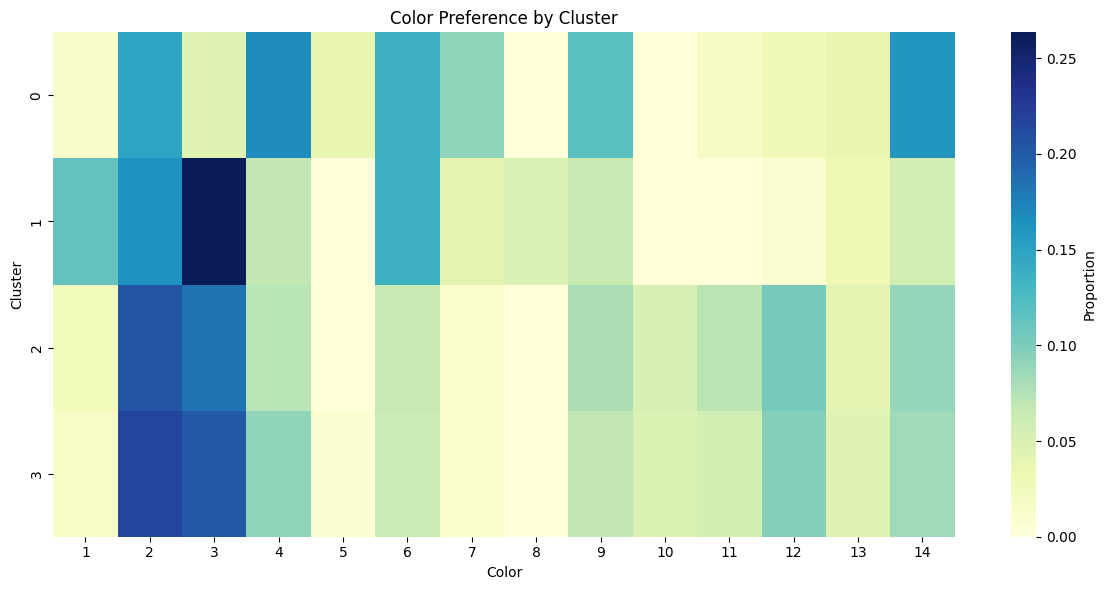

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data based on your structure
data = {
    ('cluster', 'colour'): [
        (0, 4), (0, 14), (0, 2), (0, 6), (0, 9), (0, 7), (0, 3), (0, 13), (0, 5), (0, 12), (0, 11), (0, 1),
        (1, 3), (1, 2), (1, 6), (1, 1), (1, 4), (1, 9), (1, 14), (1, 8), (1, 7), (1, 13), (1, 12),
        (2, 2), (2, 3), (2, 12), (2, 14), (2, 9), (2, 4), (2, 11), (2, 6), (2, 10), (2, 13), (2, 1), (2, 7), (2, 5),
        (3, 2), (3, 3), (3, 12), (3, 4), (3, 14), (3, 9), (3, 6), (3, 11), (3, 10), (3, 13), (3, 1), (3, 7), (3, 5)
    ],
    'proportion': [
        0.167400, 0.159660, 0.149004, 0.137006, 0.117999, 0.091439, 0.044555, 0.037427, 0.037286, 0.028676, 0.017149, 0.012397,
        0.263563, 0.162912, 0.137414, 0.112770, 0.068949, 0.063326, 0.057742, 0.050801, 0.042134, 0.031586, 0.008803,
        0.204152, 0.184068, 0.104182, 0.089520, 0.078397, 0.072975, 0.071262, 0.065728, 0.051768, 0.041853, 0.024297, 0.011573, 0.000225,
        0.216820, 0.201704, 0.096340, 0.090724, 0.083459, 0.068678, 0.062168, 0.056608, 0.048505, 0.044286, 0.016122, 0.011288, 0.006178
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df[['cluster', 'colour']] = pd.DataFrame(df.pop(('cluster', 'colour')).tolist(), index=df.index)

# Pivot for heatmap
heatmap_data = df.pivot(index='cluster', columns='colour', values='proportion').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Proportion'})
plt.title('Color Preference by Cluster')
plt.xlabel('Color')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()
